# Integration Time Analysis Based on acc_len

Two firmware configurations were deployed on SKARAB FPGAs, differing only in the acc_len parameter, which defines the integration window size. Data was collected through BRAM memory blocks, and the timing analysis was conducted using a custom Python 3 script. This auxiliary program enabled the extraction of key metrics, such as the average integration time and the standard deviation across multiple runs.

#### The results presented correspond to a total of 500 integrations performed per experimental run.

## Analysis of the 8K Firmware with 8 Inputs

All collected data were subsequently recorded in a CSV spreadsheet, which was processed using the **pandas** library in Python 3. Visualization of the results was performed with the **matplotlib** library.

This firmware operates with 8 analog input channels for simultaneous signal analysis. For comparison purposes, integration parameter values ranging from 10k to 80k were considered.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [6]:
df = pd.read_csv('Acc_len Time Table.csv')

The data recorded in the CSV files, referenced above, were read and are presented below:

In [7]:
df

,Integration_Size,Average_Time,Time_Deviation
0,10000,0.2200,0.0037
1,12500,0.2723,0.0932
2,15000,0.3272,0.1115
3,20000,0.4379,0.0035
4,25000,0.5457,0.1093
5,30000,0.6522,0.0037
6,35000,0.7645,0.1100
7,37500,0.8196,0.0938
8,40000,0.8871,0.0046
9,45000,0.9829,0.1091


The analyzed data exhibit a behavior that suggests an approximately linear pattern, albeit with some fluctuations in the standard deviation values. To better illustrate this behavior, the data were plotted on a Cartesian plane using the matplotlib library.


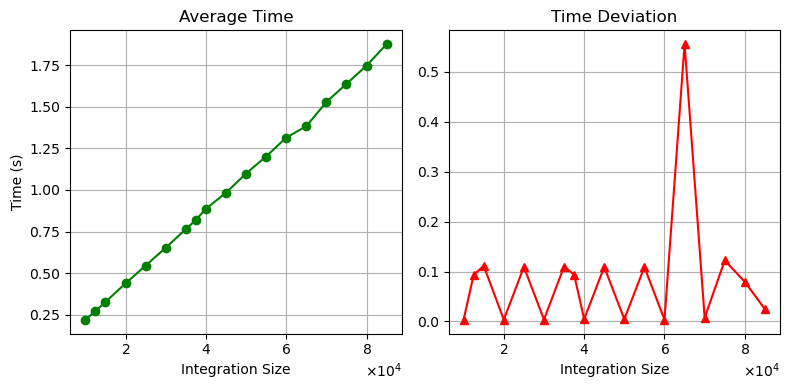

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

# Set scientific notation for both axes
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-4, 4))  # Show scientific notation if values are <1e-3 or >1e3

# Left: Average_Time
axs[0].plot(df['Integration_Size'], df['Average_Time'], marker='o', color='green')
axs[0].set_title('Average Time')
axs[0].set_xlabel('Integration Size')
axs[0].set_ylabel('Time (s)')
axs[0].xaxis.set_major_formatter(formatter)
axs[0].grid(True)

# Right: Time_Deviation
axs[1].plot(df['Integration_Size'], df['Time_Deviation'], marker='^', color='red')
axs[1].set_title('Time Deviation')
axs[1].set_xlabel('Integration Size')
axs[1].xaxis.set_major_formatter(formatter)
axs[1].grid(True)

plt.tight_layout()
plt.show()

As observed, the average integration time exhibits a linear relationship with the size of the accumulation vector (Integration_size). This result aligns with theoretical expectations, as a larger number of accumulations naturally leads to higher average integration times not interfeering with the iteration time of the **FFT**.

However, a peculiar and relatively periodic behavior is noticeable in the standard deviation values, with a notable anomaly at the acc_len value of 65,000. In this specific case, significant deviations are observed both in the standard deviation and the average integration time compared to other samples. This atypical behavior suggests the presence of systematic effects or firmware desynchronization, warranting further investigation.

## Analysis of the 32K Firmware with 2 Inputs

A new firmware with only two analog input channels was used to repeat the previous tests and verify the consistency of the linear behavior of average integration time relative to the accumulation vector size (Integration_size) across different firmware versions.

With this new firmware, a considerable increase in integration times was observed. Therefore, the analysis interval was reduced, considering only integrations with acc_len values between 2k and 10k.

Additionally, a statistical filter was applied to the data to reduce the influence of outliers on the standard deviation. This filtering is justified by the potential occurrence of synchronization issues between the initial data from the SKARAB, the host computer, and the Python program, which can significantly affect the recorded times during the first integrations.

To mitigate this effect, the first three integrations were excluded from the analysis. Subsequently, two data sets were generated: one containing all collected integration times, and another including only values whose absolute difference from the (unfiltered) mean did not exceed three times the standard deviation. This approach allowed for a more robust and representative data analysis.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [15]:
df = pd.read_csv('Acclen_times_dec16_32k.csv')

In [16]:
df

,Integration_Size,Filtered_Average_time,Filtered_Time_Deviation,Unfiltered_Average_time,Unfiltered_timeDeviation
0,2000,0.3495,0.0050,0.3492,0.0128
1,2500,0.4405,0.0093,0.4400,0.0225
2,3000,0.5241,0.1723,0.5229,0.1736
3,3500,0.6107,0.2154,0.6104,0.2153
4,4000,0.6976,0.2201,0.7021,0.2331
5,4500,0.7862,0.1493,0.7852,0.1536
6,5000,0.8806,0.0153,0.8719,0.0995
7,5500,0.9610,0.1947,0.9595,0.1993
8,6000,1.0484,0.1904,1.0463,0.2012
9,6500,1.1358,0.1590,1.1340,0.1653


### Comparing the Two Integration Times, We Obtain:

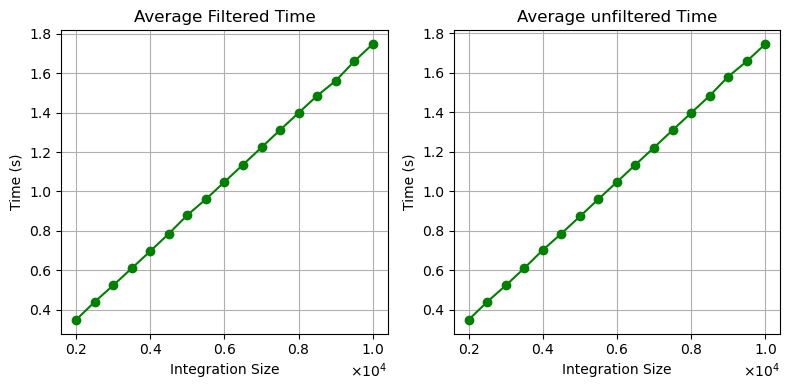

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

# Set scientific notation for both axes
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-4, 4))  # Show scientific notation if values are <1e-3 or >1e3

# Left: Filtered_Average_Time
axs[0].plot(df['Integration_Size'], df['Filtered_Average_time'], marker='o', color='green')
axs[0].set_title('Average Filtered Time')
axs[0].set_xlabel('Integration Size')
axs[0].set_ylabel('Time (s)')
axs[0].xaxis.set_major_formatter(formatter)
axs[0].grid(True)

# Right: Unfiltered_Average_Time
axs[1].plot(df['Integration_Size'], df['Unfiltered_Average_time'], marker='o', color='green')
axs[1].set_title('Average unfiltered Time')
axs[1].set_xlabel('Integration Size')
axs[1].set_ylabel('Time (s)')
axs[1].xaxis.set_major_formatter(formatter)
axs[1].grid(True)

plt.tight_layout()
plt.show()

As observed with the 8K firmware featuring 8 inputs, the average integration time exhibits a clearly linear behavior relative to the accumulation vector size. Additionally, applying the statistical filter resulted in a negligible difference in the outcomes, indicating that the raw data already had a sufficiently stable distribution for analysis purposes.

However, it is important to highlight the significant increase in average integration time observed with the new 2-input firmware. For example, at an acc_len value of 10,000, the recorded average integration time was approximately 1.7 seconds, whereas under the same conditions, the previous firmware (with 8 inputs) showed an average time of only 0.2 seconds. This substantial increase may be related to changes in the internal firmware structure, the data reading method, or specific limitations of the new hardware configuration, and warrants further investigation.

### Comparing the Two Time Standard Deviations, We Obtain:

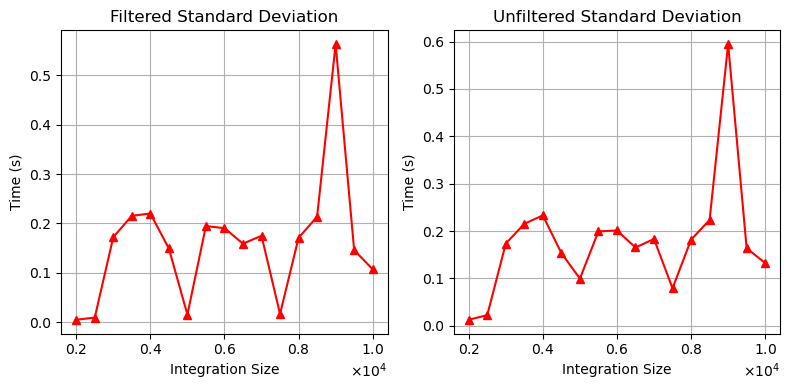

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

# Set scientific notation for both axes
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-4, 4))  # Show scientific notation if values are <1e-3 or >1e3

# Left: Filtered_Time_deviation
axs[0].plot(df['Integration_Size'], df['Filtered_Time_Deviation'], marker='^', color='red')
axs[0].set_title('Filtered Standard Deviation')
axs[0].set_xlabel('Integration Size')
axs[0].set_ylabel('Time (s)')
axs[0].xaxis.set_major_formatter(formatter)
axs[0].grid(True)

# Right: Unfiltered_Time_Deviation
axs[1].plot(df['Integration_Size'], df['Unfiltered_timeDeviation'], marker='^', color='red')
axs[1].set_title('Unfiltered Standard Deviation')
axs[1].set_xlabel('Integration Size')
axs[1].set_ylabel('Time (s)')
axs[1].xaxis.set_major_formatter(formatter)
axs[1].grid(True)

plt.tight_layout()
plt.show()

Once again, a periodic pattern is observed in the standard deviation values, with the exception of the anomalous behavior recorded at 9k.

This pattern is noteworthy, as it may indicate unforeseen characteristics in the relationship between the accumulation vector size and the synchronization among the FPGA, the host computer, and the data communication protocol. Such behavior suggests the presence of systemic effects or limitations in the integration process that warrant further investigation.

# Analysis Results

The tests confirmed the expected linear behavior between integration time and the size of the accumulation vector.

Additionally, an unforeseen characteristic was observed: a certain periodicity in the standard deviation of the average integration time, even after applying filters to remove outliers. This phenomenon may indicate interference or a stability point in the synchronization between the SKARAB and the host computer during data communication, which varies according to the accumulation vector size.

Another important aspect is the significant difference in integration times between firmwares with different numbers of input channels, suggesting that the internal architecture and resource allocation within the FPGA directly impact processing efficiency.

For a more precise and robust analysis, it is recommended to apply these evaluations directly to the firmware data to minimize possible interference or desynchronization caused by the auxiliary Python 3 program.

Finally, future investigations should explore synchronization and communication mechanisms between hardware and software, as well as assess potential firmware optimizations to reduce observed anomalies, thereby improving measurement stability and reliability.